# Extract BSE stock data using yfinance API and plot graph

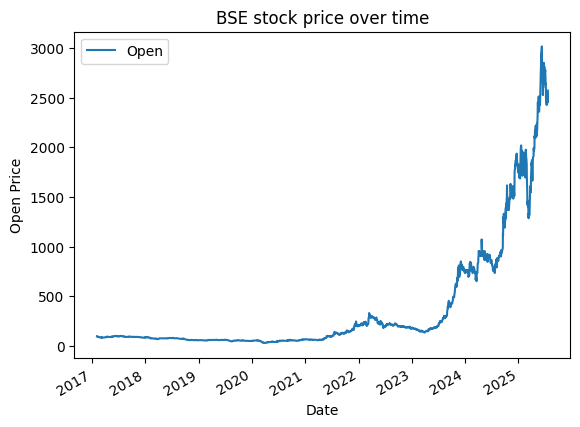

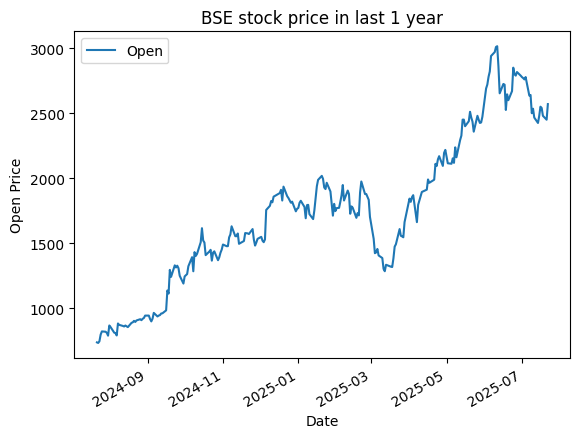

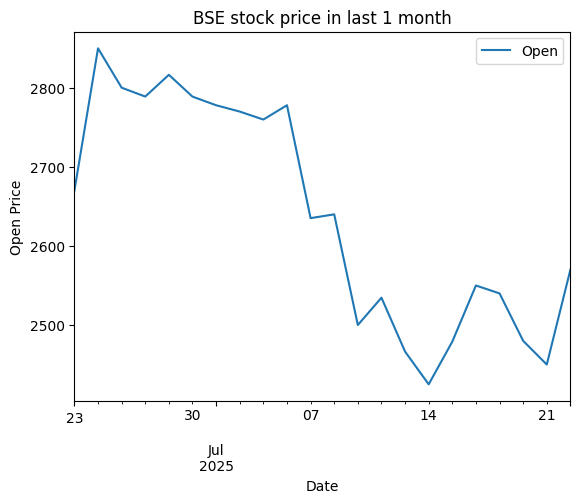

In [57]:
import matplotlib.pyplot as plt
import yfinance as yf
bse=yf.Ticker("BSE.NS")
bse_data=bse.history(period="max")
bse_data.reset_index(inplace=True)
bse_data.plot(x="Date",y="Open",title='BSE stock price over time')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.show()
bse_data_1y=bse.history(period="1y")
bse_data_1y.reset_index(inplace=True)
bse_data_1y.plot(x="Date",y="Open",title='BSE stock price in last 1 year')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.show()
bse_data_1m=bse.history(period="1mo")
bse_data_1m.reset_index(inplace=True)
bse_data_1m.plot(x="Date",y="Open",title='BSE stock price in last 1 month')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.show()

# Extract BSE stock PROS and CONS using webscraping BeautifulSoup

In [22]:
from bs4 import BeautifulSoup
import requests
url="https://www.screener.in/company/BSE/consolidated/"
html_data=requests.get(url).text
soup=BeautifulSoup(html_data,'html.parser')
pros=soup.find('div',class_='pros')
print(pros.text)
cons=soup.find('div',class_='cons')
print(cons.text)


Pros

Company is almost debt free.Company is expected to give good quarterCompany has delivered good profit growth of 64.1% CAGR over last 5 yearsCompany has been maintaining a healthy dividend payout of 41.1%



Cons

Stock is trading at 23.4 times its book value




# Finding Quarterly Results Using Pandas

In [54]:
import pandas as pd
tables=pd.read_html(url)
table=tables[0]
table_df=pd.DataFrame(table)
table_df.rename(columns={'Unnamed: 0':''},inplace=True)
print("Company Quarterly Results[Numbers in Crores]")
print(table_df[0:11])

Company Quarterly Results[Numbers in Crores]
                      Mar 2022 Jun 2022 Sep 2022 Dec 2022 Mar 2023 Jun 2023  \
0             Sales +      228      193      234      239      259      260   
1          Expenses +      144      137      184      165      132      146   
2    Operating Profit       85       56       50       74      127      114   
3               OPM %      37%      29%      21%      31%      49%      44%   
4      Other Income +       21       16       21       20       22      430   
5            Interest        8        8        7        6        6        7   
6        Depreciation       13       10       12       17       21       21   
7   Profit before tax       85       54       51       71      122      516   
8               Tax %      16%      25%      42%      33%      27%      15%   
9        Net Profit +       72       40       29       48       89      440   
10          EPS in Rs     1.84     1.08     0.83     1.27     2.24    10.89   

   Sep